# Figures S20

This notebook loads the data and produces figure S20.

In [1]:
savedate = '20251031'

In [2]:
dac_path = '' # path to secondary data
data_folder = '' # path to data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import state_name_crs_mappings_ML as crsm
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib
matplotlib.rcParams['font.family'] = 'Arial'
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Load and preprocess data

In [4]:
# Load CT-level data
df_ct_level = pd.read_csv(data_folder + '23_level_CT_US_imputedquantiles_20250722.zip',dtype={'GEOID':str,'STATEFP':str,'COUNTYFP':str,'BGFIPS':str},index_col=0)
df_ct_level['STATEFP'] = df_ct_level['STATEFP'].str.zfill(2)
df_ct_level['COUNTYFP'] = df_ct_level['COUNTYFP'].str.zfill(5)

# Load IRA neighbours data (produced in figureS19 file)
ira_nbd_info = pd.read_csv(dac_path + 'ira_neighbours_info.csv', index_col=0)

# Merge
df_ct_level = df_ct_level.reset_index().merge(ira_nbd_info, on='TRACTFP')

In [5]:
# Information about column names
label_mapping = {}
label_mapping['Column Names'] = {0:'University_college_campuses', 
                                 1:'Weekday_daytime_short_stops', 
                                 2:'City_neighborhoods', 
                                 3:'Weekday_daytime_long_stops', 
                                 4:'Gas_stations_very_short_stops', 
                                 5:'Weekend_evening_recreation', 
                                 6:'High_density_city', 
                                 7:'Hotels'}

cluster_order_numbers8_v3 = [1, 3, 5, 2, 6, 7, 4, 0]
cluster_order_names = [label_mapping['Column Names'][i] for i in cluster_order_numbers8_v3]
cluster_cols = ['no_stations_k8_'+label_mapping['Column Names'][i] for i in range(8)]

In [6]:
# Calculations for figure
cts_disadv_nbds = pd.concat((pd.DataFrame(df_ct_level.loc[(df_ct_level['Share of neighbors that are identified as disadvantaged']>75)].loc[:, cluster_cols].sum(), columns=['75-100_disadv_nbd']), 
                             pd.DataFrame(df_ct_level.loc[(df_ct_level['Share of neighbors that are identified as disadvantaged']>50)&(df_ct_level['Share of neighbors that are identified as disadvantaged']<=75)].loc[:, cluster_cols].sum(), columns=['50-75_disadv_nbd']), 
                             pd.DataFrame(df_ct_level.loc[(df_ct_level['Share of neighbors that are identified as disadvantaged']>25)&(df_ct_level['Share of neighbors that are identified as disadvantaged']<=50)].loc[:, cluster_cols].sum(), columns=['25-50_disadv_nbd']), 
                             pd.DataFrame(df_ct_level[df_ct_level['Share of neighbors that are identified as disadvantaged']<=25].loc[:, cluster_cols].sum(), columns=['<25_disadv_nbd'])), axis=1)
cts_disadv_nbds = cts_disadv_nbds.T

cts_disadv_yesno = df_ct_level.groupby('Identified as disadvantaged')[cluster_cols].sum()
cts_disadv_yesno = cts_disadv_yesno.iloc[[1,0]]
cts_disadv_yesno = cts_disadv_yesno.reset_index()

# Plot

RangeIndex(start=0, stop=2, step=1)


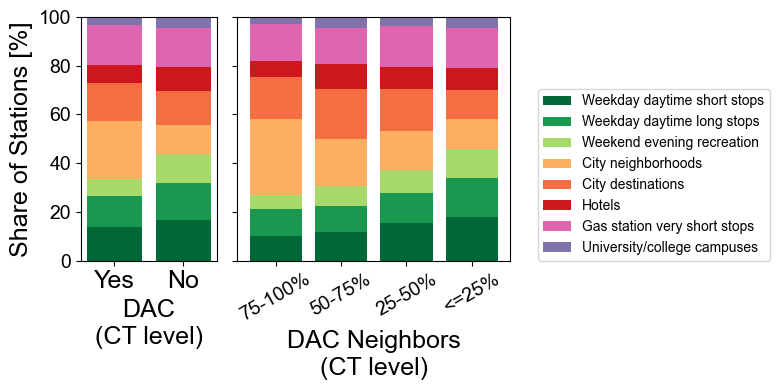

In [7]:
xvals = [1,2,3,4,5]
disadv_label_rename = {True:'Yes', False:'No', 0:'Yes', 1:'No'}
nbd_label_rename = {'75-100_disadv_nbd':'75-100%', '50-75_disadv_nbd':'50-75%', '25-50_disadv_nbd':'25-50%', '<25_disadv_nbd':'<=25%'}

colours_dict8_v3 = {1:'#006837',
                    3:'#1a9850',
                    5:'#a6d96a',
                    2:'#fdae61',
                    6:'#f46d43',
                    7:'#cb181d',
                    4:'#df65b0',
                    0:'#8073ac'}
label_mapping['Nice Names'] = {0:'University/college campuses',
                               1:'Weekday daytime short stops',
                               2:'City neighborhoods',
                               3:'Weekday daytime long stops',
                               4:'Gas station very short stops',
                               5:'Weekend evening recreation',
                               6:'City destinations',
                               7:'Hotels'}

fig, axes = plt.subplots(1, 2, sharex=False, sharey=True, figsize=(8, 4), width_ratios=[0.4,0.8])

xvals = cts_disadv_yesno.index
print(xvals)
normvals_here = cts_disadv_yesno.sum(axis=1).loc[[0, 1]]
bottoms = np.zeros((len(xvals),))
for j in range(8):
    tmp = cts_disadv_yesno['no_stations_k8_'+cluster_order_names[j]].copy().loc[[0, 1]]
    for key in normvals_here.keys():
        tmp[key] = tmp[key] / normvals_here[key]
    axes[0].bar(xvals, [tmp[k] for k in xvals], bottom=bottoms, color=colours_dict8_v3[cluster_order_numbers8_v3[j]])
    bottoms += tmp.values
axes[0].set_xticks(list(cts_disadv_yesno.index))
axes[0].set_xticklabels([disadv_label_rename[key] for key in xvals], fontsize=18)

    
xvals = cts_disadv_nbds.index
normvals_here = cts_disadv_nbds.sum(axis=1)
bottoms = np.zeros((len(xvals),))
for j in range(8):
    tmp = cts_disadv_nbds['no_stations_k8_'+cluster_order_names[j]].copy()
    for key in normvals_here.keys():
        tmp[key] = tmp[key] / normvals_here[key]
    axes[1].bar(xvals, [tmp[k] for k in xvals], bottom=bottoms, 
                color=colours_dict8_v3[cluster_order_numbers8_v3[j]], label=label_mapping['Nice Names'][cluster_order_numbers8_v3[j]])
    bottoms += tmp.values
axes[1].set_xticks(xvals)
axes[1].set_xticklabels([nbd_label_rename[key] for i, key in enumerate(xvals)], fontsize=14, rotation=30)
    
axes[1].legend(loc=(1.1,0))
    
axes[0].set_ylabel('Share of Stations [%]', fontsize=18)
axes[0].set_ylim([0,1])
axes[0].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
axes[0].set_yticklabels([0, 20, 40, 60, 80, 100], fontsize=14)

axes[0].set_xlabel('DAC\n(CT level)', fontsize=18)
axes[1].set_xlabel('DAC Neighbors\n(CT level)', fontsize=18)

plt.tight_layout()
plt.savefig('Figures/figureS20_clustershare_IRA_'+savedate+'.pdf', bbox_inches='tight')
plt.show()
